In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[0].shape

(28, 28)

(-0.5, 27.5, 27.5, -0.5)

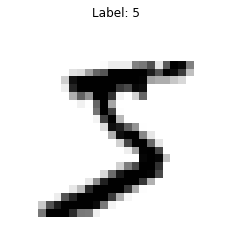

In [7]:
import matplotlib.pyplot as plt

plt.title(f'Label: {y_train[0]}')
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.axis('off')

In [8]:
# CNN 사용 시 차원 늘리기
# (28, 28) -> (28, 28, 1)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
# 입력 (28, 28)
# 출력 (10,)
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

# 입력 (28, 28, 1)
# 출력 (10,)
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((28, 28, 1)),
    tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                125450    
Total params: 144,266
Trainable params: 144,266
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 느리면 런타임 -> 런타임 유형 변경 -> GPU 선택
# 일일 이용 시간 제한 있음
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1294 - accuracy: 0.9615
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0453 - accuracy: 0.9862
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0308 - accuracy: 0.9902
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0216 - accuracy: 0.9932
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0164 - accuracy: 0.9945


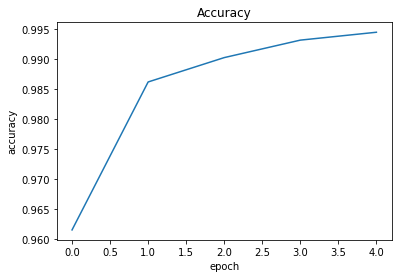

In [11]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

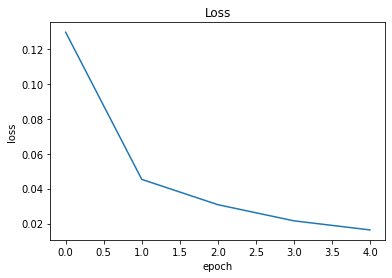

In [12]:
plt.title('Loss')
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [13]:
accuracy, loss = model.evaluate(x_test, y_test, verbose=2)
print(f"오차: {accuracy:.2f} 정확도: {loss*100:.1f}%")

313/313 - 1s - loss: 0.0379 - accuracy: 0.9881
오차: 0.04 정확도: 98.8%
